In [ ]:
#SEABORN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Categóricos

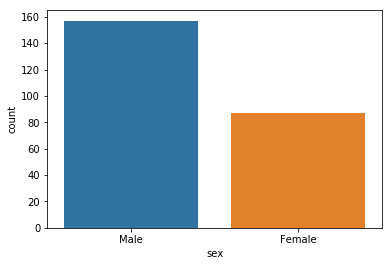

In [31]:
sns.countplot(x='sex',data=tips)

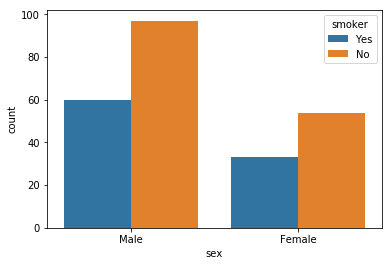

In [33]:
sns.countplot(x="sex", hue="smoker", data=tips)

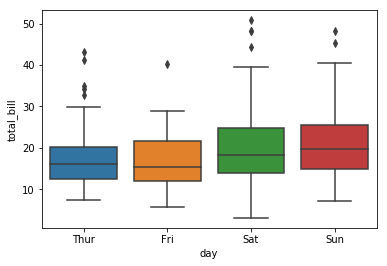

In [5]:
sns.boxplot(x="day", y="total_bill", data=tips)

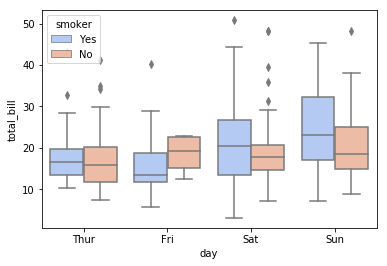

In [6]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

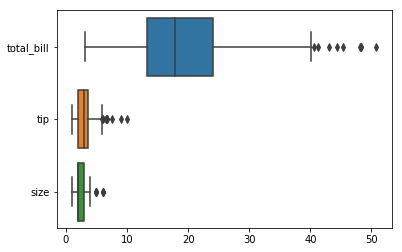

In [8]:
sns.boxplot(data=tips,orient='h')

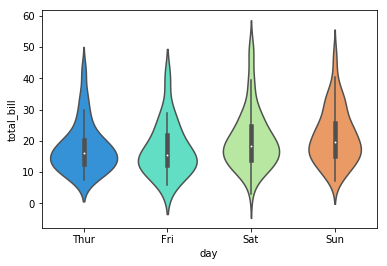

In [9]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

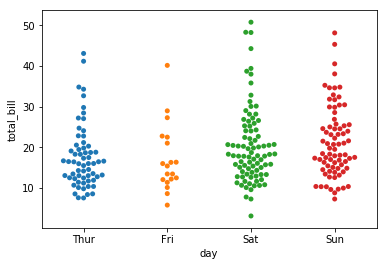

In [10]:
sns.swarmplot(x="day", y="total_bill", data=tips)

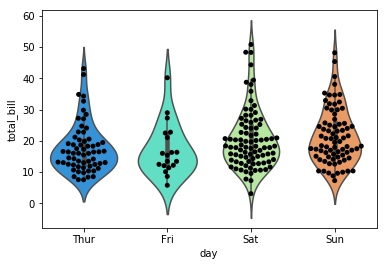

In [12]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')
sns.swarmplot(x="day", y="total_bill", data=tips,color='black',size=5)

#### Distribução de uma variável

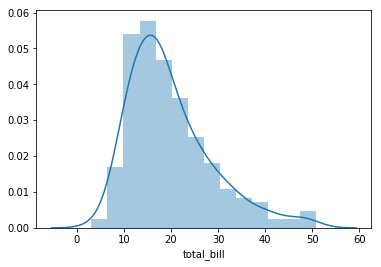

In [4]:
sns.distplot(tips['total_bill'])

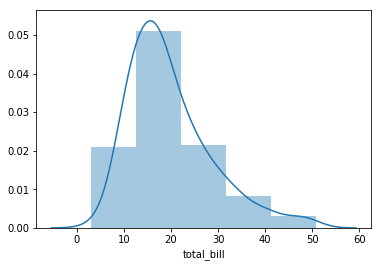

In [5]:
#Parametro "Bins"
sns.distplot(tips['total_bill'],bins=5)

#### Distribução entre variáveis

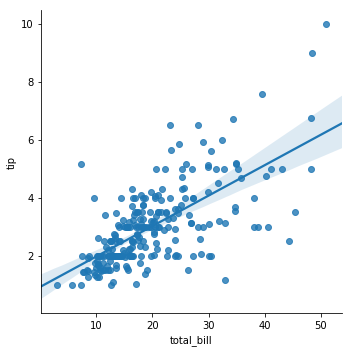

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips)

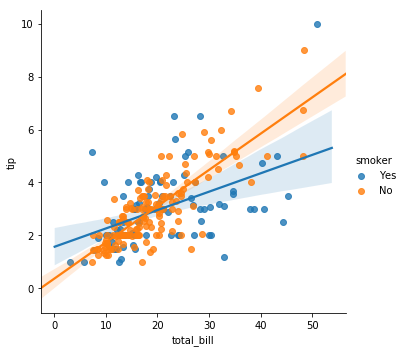

In [7]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='smoker')

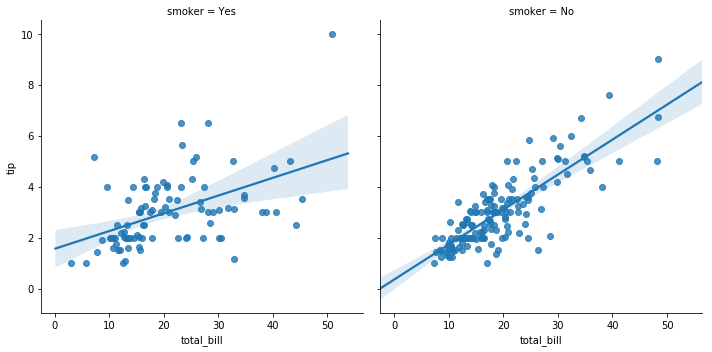

In [8]:
sns.lmplot(x="total_bill", y="tip", col="smoker",data=tips)

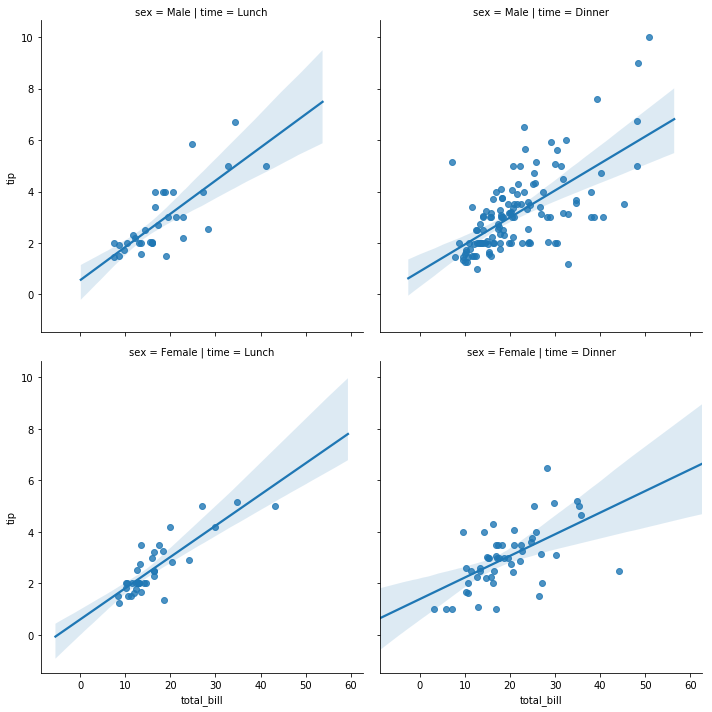

In [9]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

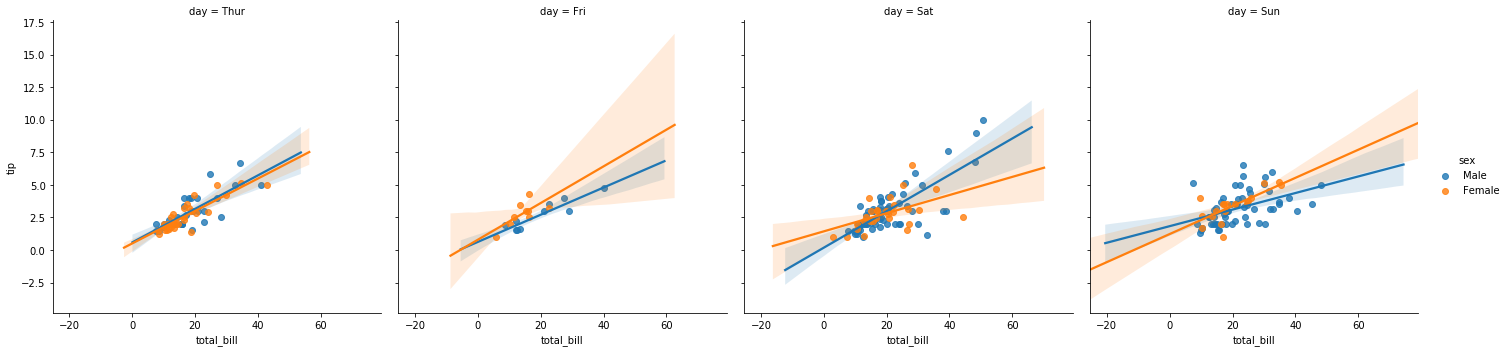

In [10]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')

## jointplot

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

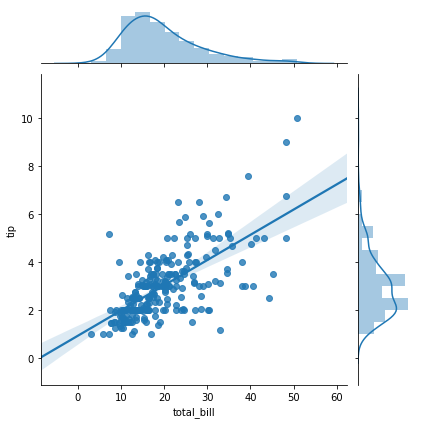

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### PairGrid / PairPlot

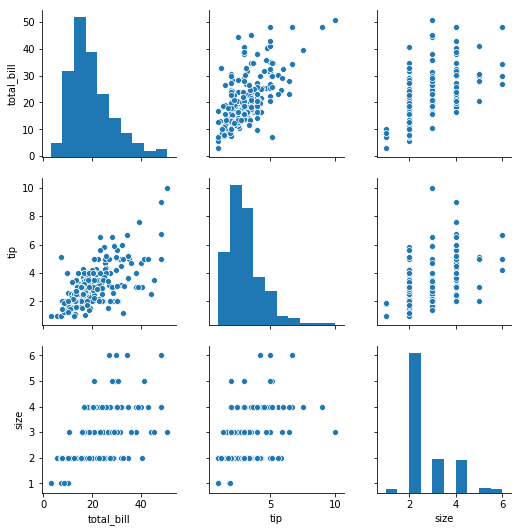

In [15]:
sns.pairplot(tips)

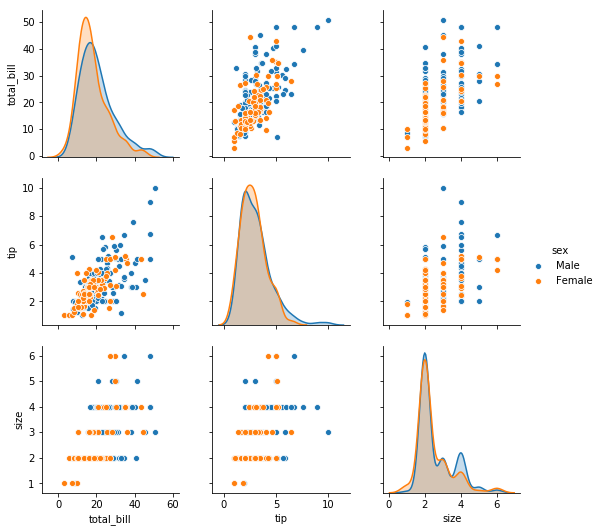

In [17]:
sns.pairplot(tips, hue='sex')

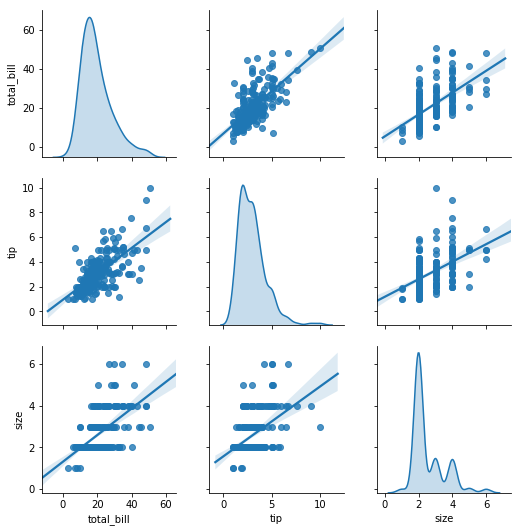

In [18]:
sns.pairplot(tips, diag_kind="kde", kind="reg")

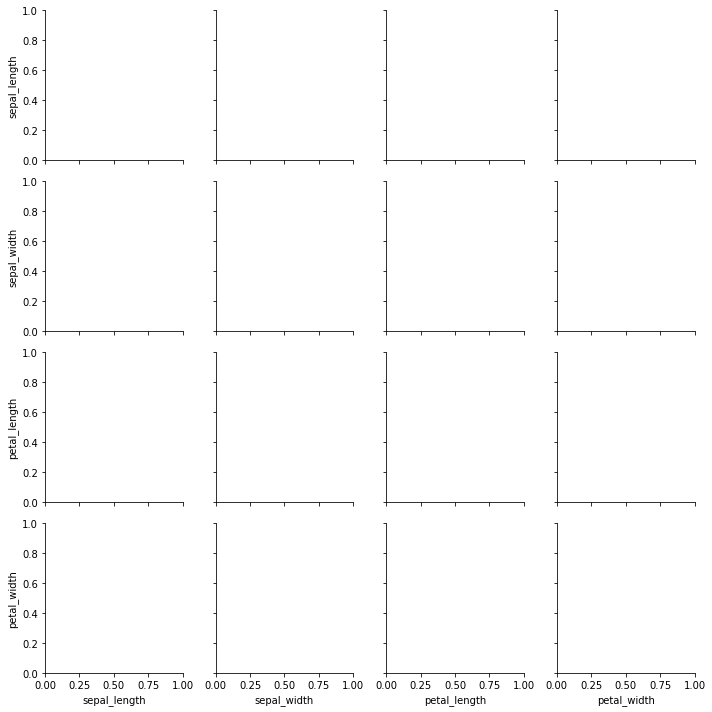

In [21]:
sns.PairGrid(iris)

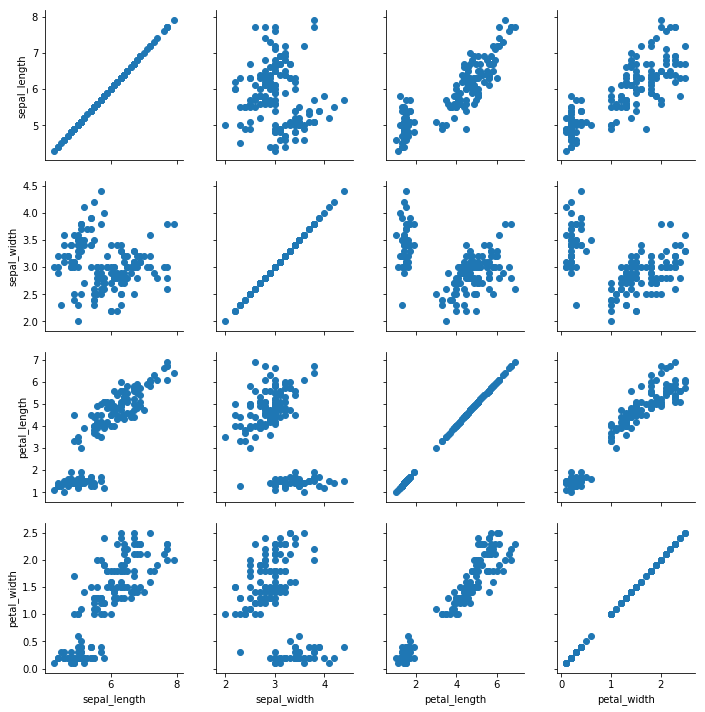

In [22]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

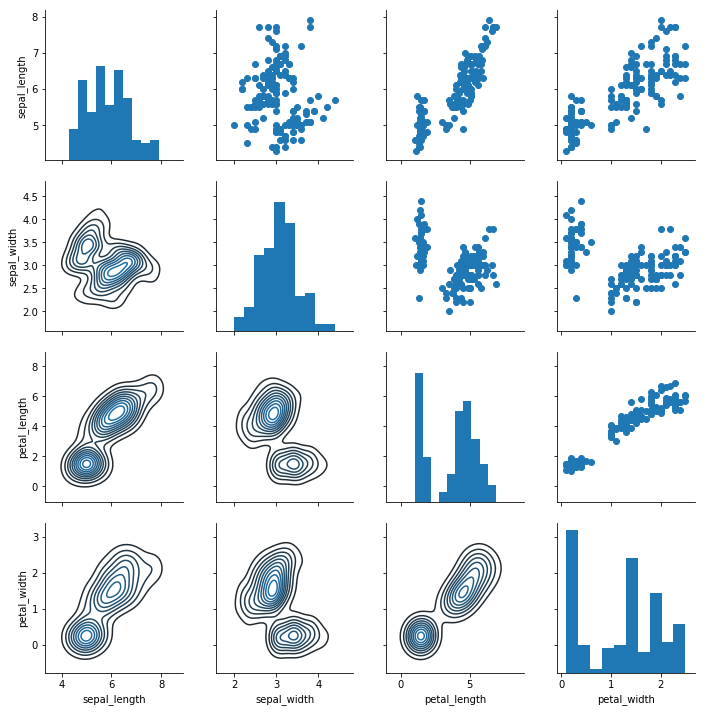

In [27]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

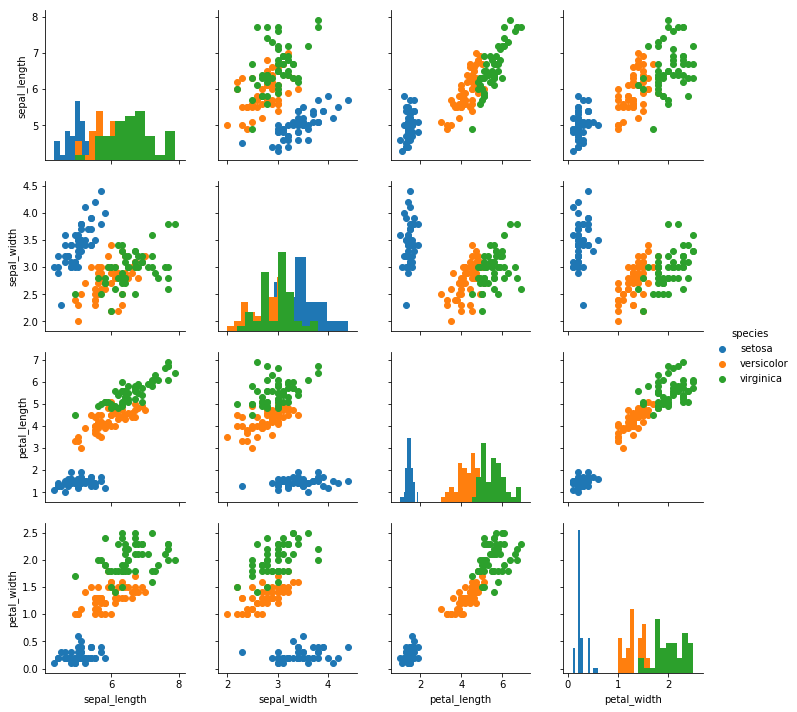

In [28]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [14]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


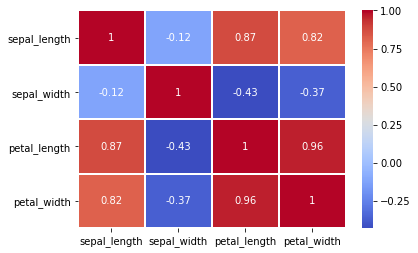

In [20]:
sns.heatmap(corr,cmap='coolwarm',linecolor='white',linewidths=1, annot=True)

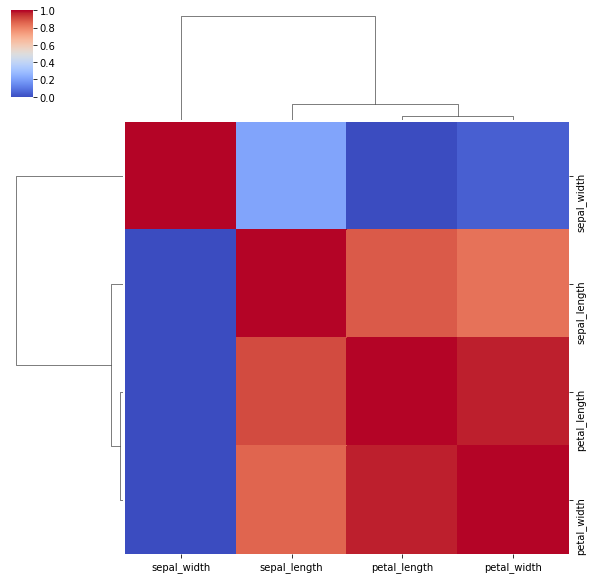

In [34]:
sns.clustermap(corr,cmap='coolwarm',standard_scale=5)